## TODO
1. Add surface temp and skin temp to rtmodel call
2. Add transect filepath to transect summary - filter on just transects
3. Plot time series of fluxes
4. Compare estimated downwelling SW and observed SW

In [1]:
import sys
sys.path.append("../mosaic_underice_sunlight/")

import warnings  # to ignore future warnings
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd

from rtmodel import seaicert_mp
from plotting import plot_results, plot_thickness_profile
from mosaic_thickness import load_cleaned_transect, load_transect_metadata
from filepath import FORCING_DATAPATH, RESULTS_DATAPATH

from data.get_metdata_for_transects import load_transect_summary

/home/apbarret/mambaforge/envs/mosaic_underice_sunlight/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
def make_results_path(fp, model, output_type="data"):
    fp_out = RESULTS_DATAPATH / fp.relative_to(fp.parents[2])
    if output_type == "data":
        return fp_out.parent / (fp_out.stem + f".{model}.csv")
    elif output_type == "figure":
        return fp_out.parent / (fp_out.stem + f".{model}.png")
    else:
        raise KeyError("Unexpected output_type {output_type}.\nExpects one of data, figure")

CPU times: user 369 ms, sys: 3.82 ms, total: 373 ms
Wall time: 371 ms


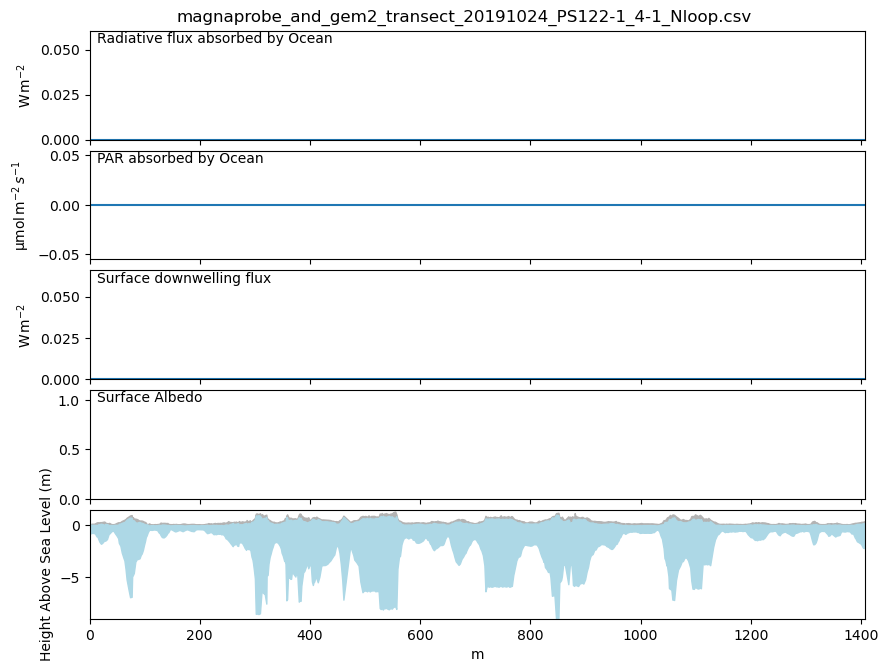

In [35]:
%%time
for transect in FORCING_DATAPATH.glob("**/*.csv"):

    # Make output paths
    data_path = make_results_path(transect, "seaicert", output_type="data")
    figure_path = make_results_path(transect, "seaicert", output_type="figure")

    # Create paths if they do not exist
    figure_path.parent.mkdir(parents=True, exist_ok=True)
    data_path.parent.mkdir(parents=True, exist_ok=True)

    # Load data
    df = load_cleaned_transect(transect)

    # Run model
    rt_df = seaicert_mp(df)

    # Save results
    rt_df.to_csv(data_path)

    # Make plot and save
    fig = plot_results(rt_df, title=transect.name)
    fig.savefig(figure_path)
    break

In [36]:
rt_df

,lon,lat,local_x,local_y,ice_thickness_m,snow_depth_m,melt_pond_depth_m,surface_type,transect_distance_m,ice_thickness_flag,measured_irradiance_wm2,air_temperature_K,surface_temperature_K,sw_absorbed_by_ocean,lw_absorbed_by_ocean,downwelling_radiative_flux_absorbed_by_ocean,qpar_absorbed_by_ocean,surface_albedo,surface_downwelling_radiative_flux
date/time,,,,,,,,,,,,,,,,,,,
2019-10-24 05:23:21,129.203948,85.391298,402.264351,-84.014028,0.809786,0.09370,0.0,1.0,0.000000,1,0.09564,261.721008,261.773997,0.0,0.0,0.0,0.0,NaN,0.0
2019-10-24 05:23:25,129.204068,85.391328,401.974312,-85.764966,0.841499,0.06073,0.0,1.0,1.774797,1,0.09564,261.721008,261.773997,0.0,0.0,0.0,0.0,NaN,0.0
2019-10-24 05:23:28,129.204177,85.391347,402.260320,-89.032462,0.761214,0.11750,0.0,1.0,5.054787,1,0.09564,261.721008,261.773997,0.0,0.0,0.0,0.0,NaN,0.0
2019-10-24 05:23:31,129.204250,85.391365,402.100131,-91.172290,0.787629,0.10280,0.0,1.0,7.200603,1,0.09564,261.721008,261.773997,0.0,0.0,0.0,0.0,NaN,0.0
2019-10-24 05:23:34,129.204278,85.391375,402.205674,-93.142653,0.806786,0.12430,0.0,1.0,9.173791,1,0.09564,261.721008,261.773997,0.0,0.0,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-24 06:48:35,129.148345,85.395567,427.943478,-90.206071,1.739343,0.14040,0.0,1.0,1394.681611,1,0.09564,261.721008,261.773997,0.0,0.0,0.0,0.0,NaN,0.0
2019-10-24 06:48:40,129.148432,85.395565,423.888365,-90.630688,1.893086,0.15860,0.0,1.0,1398.758895,1,0.09564,261.721008,261.773997,0.0,0.0,0.0,0.0,NaN,0.0
2019-10-24 06:48:46,129.148677,85.395555,422.518198,-90.794126,1.960214,0.19670,0.0,1.0,1400.138776,1,0.09564,261.721008,261.773997,0.0,0.0,0.0,0.0,NaN,0.0
